In [47]:
pip install graphviz

     ---------------------------------------- 47.0/47.0 kB 2.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [55]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from operator import itemgetter
from sklearn.preprocessing import StandardScaler
from sklearn.svm import NuSVR
import graphviz
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn import tree
%matplotlib inline 

In [26]:
data = pd.read_csv('diabetes_prediction_dataset.csv')
#https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset

In [27]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [28]:
le = LabelEncoder()
data['gender'] = le.fit_transform(data['gender'])
data = data.drop(columns=['smoking_history'])
data = data.drop(columns=['bmi'])
data = data.drop(columns=['heart_disease'])
data.head

<bound method NDFrame.head of        gender   age  hypertension  HbA1c_level  blood_glucose_level  diabetes
0           0  80.0             0          6.6                  140         0
1           0  54.0             0          6.6                   80         0
2           1  28.0             0          5.7                  158         0
3           0  36.0             0          5.0                  155         0
4           1  76.0             1          4.8                  155         0
...       ...   ...           ...          ...                  ...       ...
99995       0  80.0             0          6.2                   90         0
99996       0   2.0             0          6.5                  100         0
99997       1  66.0             0          5.7                  155         0
99998       0  24.0             0          4.0                  100         0
99999       0  57.0             0          6.6                   90         0

[100000 rows x 6 columns]>

In [65]:
data = data[data.index < 5000]
data.head()

,gender,age,hypertension,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,6.6,140,0
1,0,54.0,0,6.6,80,0
2,1,28.0,0,5.7,158,0
3,0,36.0,0,5.0,155,0
4,1,76.0,1,4.8,155,0


In [30]:
TARGET_KEY = 'diabetes'
X_data, y_data = data.drop(columns=[TARGET_KEY]), data[[TARGET_KEY]]
X_test, X_train, y_test, y_train = train_test_split(X_data, y_data)

In [31]:
def class_accuracy_score(y_true: pd.DataFrame, y_pred: np.ndarray):
    unique, counts = np.unique(y_true[TARGET_KEY], return_counts=True)
    y_true_values = y_true[TARGET_KEY].values
    result = {}
    for value in unique:
        result[value] = 0
    for index in range(len(y_true_values)):
        if y_true_values[index] == y_pred[index]:
            result[y_true_values[index]] += 1
    for index in range(len(unique)):
        result[unique[index]] /= counts[index]
    result['all'] = accuracy_score(y_true, y_pred)
    return result

In [32]:
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

D:\education\PONIRS\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [33]:
scaler = StandardScaler().fit(X_train)
x_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
x_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)
x_train_scaled.describe()

,gender,age,hypertension,HbA1c_level,blood_glucose_level
count,1.250000e+03,1.250000e+03,1.250000e+03,1.250000e+03,1.250000e+03
mean,-1.197265e-16,-9.396928e-17,-1.838529e-16,-4.813927e-16,2.279066e-16
std,1.000400e+00,1.000400e+00,1.000400e+00,1.000400e+00,1.000400e+00
min,-8.607828e-01,-1.891689e+00,-2.900489e-01,-1.805731e+00,-1.411052e+00
25%,-8.607828e-01,-7.528351e-01,-2.900489e-01,-6.419678e-01,-9.045941e-01
50%,-8.607828e-01,2.407130e-02,-2.900489e-01,2.532350e-01,1.083212e-01
75%,1.161733e+00,8.009778e-01,-2.900489e-01,6.113161e-01,5.641330e-01
max,1.161733e+00,1.760686e+00,3.447695e+00,3.117884e+00,4.159982e+00


In [34]:
nusvr_05 = NuSVR(nu=0.7, gamma = 'scale')
nusvr_05.fit(X_train, y_train)

D:\education\PONIRS\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


NuSVR(nu=0.7)

In [36]:
svm = SVC(kernel='linear', random_state=0)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

D:\education\PONIRS\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [37]:
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [38]:
lr_accuracy_scores = class_accuracy_score(y_test, y_pred_lr)
pd.DataFrame.from_dict(lr_accuracy_scores, orient='index', columns=['accuracy'])

,accuracy
0,0.988606
1,0.639144
all,0.958133


In [39]:
svm_accuracy_scores = class_accuracy_score(y_test, y_pred_svm)
pd.DataFrame.from_dict(svm_accuracy_scores, orient='index', columns=['accuracy'])

,accuracy
0,0.995618
1,0.593272
all,0.960533


In [40]:
dt_accuracy_scores = class_accuracy_score(y_test, y_pred_dt)
pd.DataFrame.from_dict(dt_accuracy_scores, orient='index', columns=['accuracy'])

,accuracy
0,0.964651
1,0.746177
all,0.945600


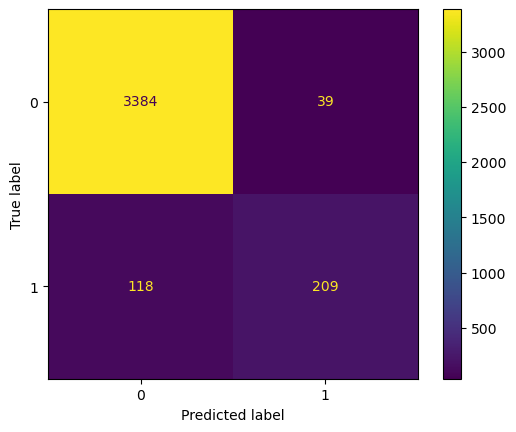

In [41]:
lr_confusion_matrix = confusion_matrix(y_test, y_pred_lr)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr)

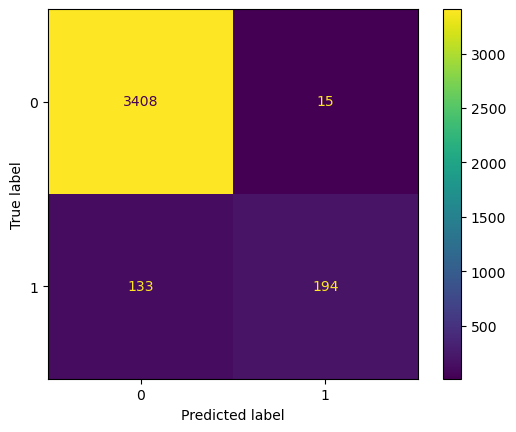

In [42]:
svm_confusion_matrix = confusion_matrix(y_test, y_pred_svm)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svm)

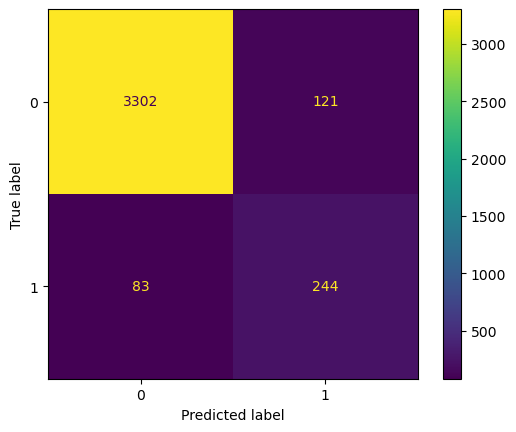

In [43]:
dt_confusion_matrix = confusion_matrix(y_test, y_pred_dt)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dt)

In [44]:
def draw_feature_importances(tree_model, X_dataset, figsize=(18,5)):
    """
    Вывод важности признаков в виде графика
    """
    # Сортировка значений важности признаков по убыванию
    list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
    # Названия признаков
    labels = [x for x,_ in sorted_list]
    # Важности признаков
    data = [x for _,x in sorted_list]
    # Вывод графика
    fig, ax = plt.subplots(figsize=figsize)
    ind = np.arange(len(labels))
    plt.bar(ind, data)
    plt.xticks(ind, labels, rotation='vertical')
    # Вывод значений
    for a,b in zip(ind, data):
        plt.text(a-0.05, b+0.01, str(round(b,3)))
    plt.show()
    return labels, data



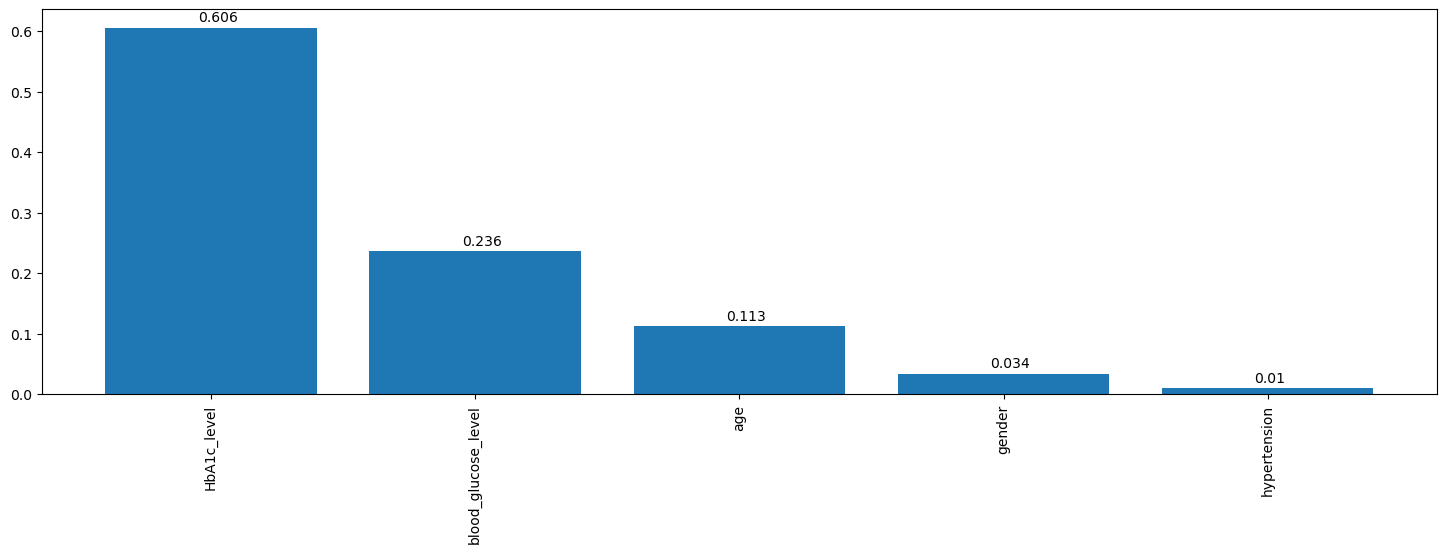

(['HbA1c_level', 'blood_glucose_level', 'age', 'gender', 'hypertension'],
 [0.6058557887068846,
  0.23648375480051784,
  0.11290684902174908,
  0.03434315580328105,
  0.010410451667567405])

In [45]:
draw_feature_importances(dt, X_test)

In [63]:
dt_none = DecisionTreeRegressor(max_depth=4)
dt_none.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4)

[Text(0.75, 0.9, 'X[3] <= 6.7\nsquared_error = 0.08\nsamples = 1250\nvalue = 0.087'),
 Text(0.625, 0.7, 'X[4] <= 210.0\nsquared_error = 0.045\nsamples = 1197\nvalue = 0.047'),
 Text(0.5, 0.5, 'X[1] <= 38.5\nsquared_error = 0.033\nsamples = 1182\nvalue = 0.035'),
 Text(0.25, 0.3, 'X[2] <= 0.5\nsquared_error = 0.002\nsamples = 559\nvalue = 0.002'),
 Text(0.125, 0.1, 'squared_error = 0.0\nsamples = 551\nvalue = 0.0'),
 Text(0.375, 0.1, 'squared_error = 0.109\nsamples = 8\nvalue = 0.125'),
 Text(0.75, 0.3, 'X[3] <= 5.35\nsquared_error = 0.06\nsamples = 623\nvalue = 0.064'),
 Text(0.625, 0.1, 'squared_error = 0.0\nsamples = 236\nvalue = 0.0'),
 Text(0.875, 0.1, 'squared_error = 0.093\nsamples = 387\nvalue = 0.103'),
 Text(0.75, 0.5, 'squared_error = 0.0\nsamples = 15\nvalue = 1.0'),
 Text(0.875, 0.7, 'squared_error = 0.0\nsamples = 53\nvalue = 1.0')]

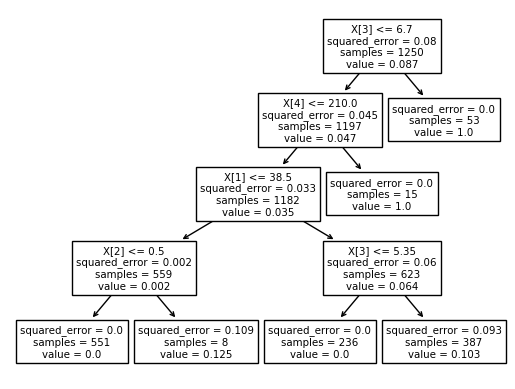

In [64]:
tree.plot_tree(dt_none)